In [1]:
# Required basic package to read the dataset
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


# Check Autocorrelation part 

In [4]:
from numpy import log
from pandas import Series
from datetime import datetime
# autocorrelation
import statsmodels.api as sm

In [5]:
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

0.0121527966037621

In [ ]:
# Autocorrelation found as durbin watson test = 0.01215

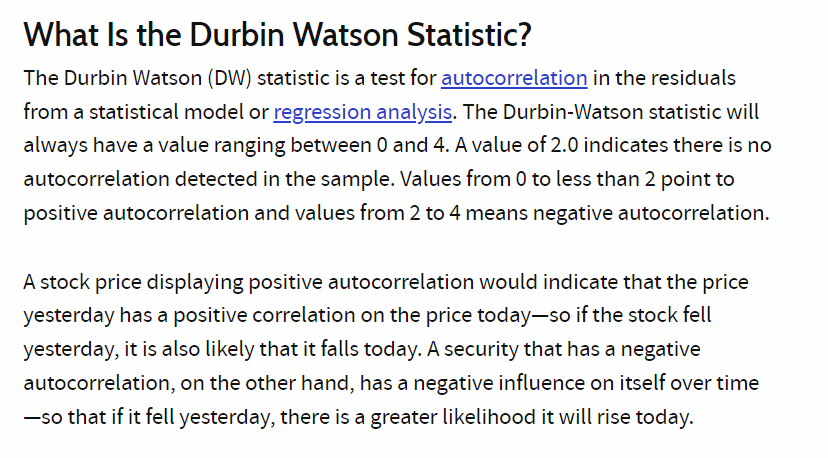

In [6]:
dataset.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
len(dataset)

144

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
# set month as a index variable to perform time series forecasting

dataset.set_index('Month', inplace=True)

dataset.head()

# Life cycle of time series forecasting

### 1) Understand the objective/Define Goal
### 2) Get Data
### 3) Explore the data and to see whether data is applicable for TSF - to check missing value, date is given into same formate, Durbin Watson Test
### 4) Visualize the series to understand (Trend, Seasonality and Irregular)
### 5) Pre-Process Data - 
    # to check data is Stationary or not, if not then first make 
    # stationary and then perform further steps
### 6) Apply Forecasting methods
### 7) Partition series - and validate the predicted with the original dataset
### 8) Evaluate & Compare Performance - Visualization and AIC or BIC or MAE etc
### 9) Implement Forecasts/system

<AxesSubplot:xlabel='Month'>

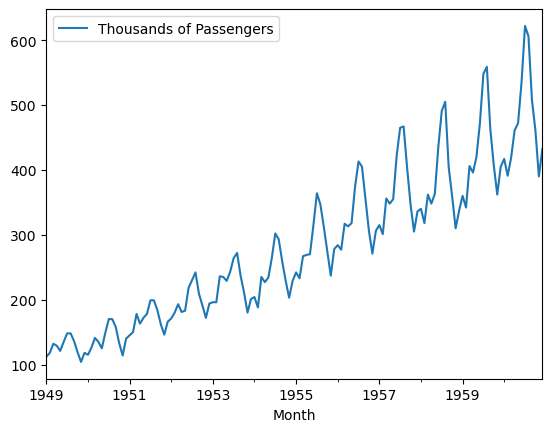

In [14]:
dataset.plot()

# To check the TSF component - we have to do Decomposition

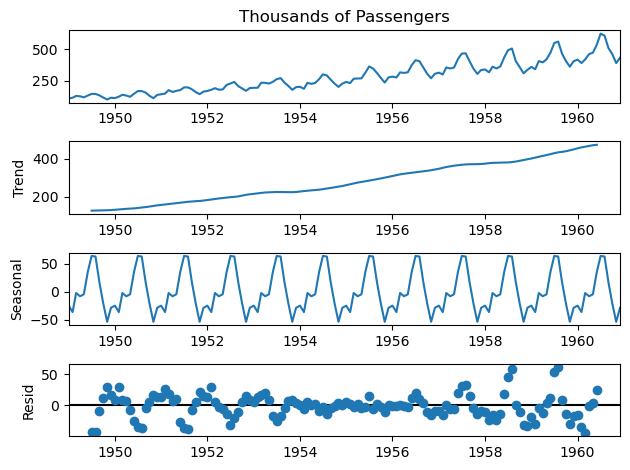

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(dataset['Thousands of Passengers'], period=12, model='additive')
decompose.plot()
plt.show()

# To check data is Stationary or not  - Augmented Dickey Fuller Test - Mandatory Steps

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [28]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("************Augmented Dickey Fuller Test************")
    labels = ['ADF Statistic Test', 'p-value', '#Lags', 'No of Observation']
    
    for a, b in zip(result, labels):
        print(b + " : " + str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis and my timeseries is Non-Stationary")   
    

In [29]:
adf_check(dataset['Thousands of Passengers'])

************Augmented Dickey Fuller Test************
ADF Statistic Test : 0.8153688792060543
p-value : 0.9918802434376411
#Lags : 13
No of Observation : 130
Weak evidence against null hypothesis and my timeseries is Non-Stationary


# We have to make our time series stationary first by using "Lag Function" and then only perform further steps

In [30]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [31]:
dataset.head(20)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [34]:
adf_check(dataset['1st Diff'].dropna())

************Augmented Dickey Fuller Test************
ADF Statistic Test : -2.8292668241700034
p-value : 0.054213290283824954
#Lags : 12
No of Observation : 130
Weak evidence against null hypothesis and my timeseries is Non-Stationary


In [35]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [36]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [37]:
adf_check(dataset['2nd Diff'].dropna())

************Augmented Dickey Fuller Test************
ADF Statistic Test : -16.384231542468488
p-value : 2.7328918500143186e-29
#Lags : 11
No of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [38]:
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [39]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [40]:
adf_check(dataset['Seasonality'].dropna())

************Augmented Dickey Fuller Test************
ADF Statistic Test : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# Trend
# p = ?
# d = 2
# q = ?

# Seasonality
# P = ?
# D = 1
# Q = ?

In [41]:
# Visualize and find P/Q and p/q  (for both trend and seasonality)

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

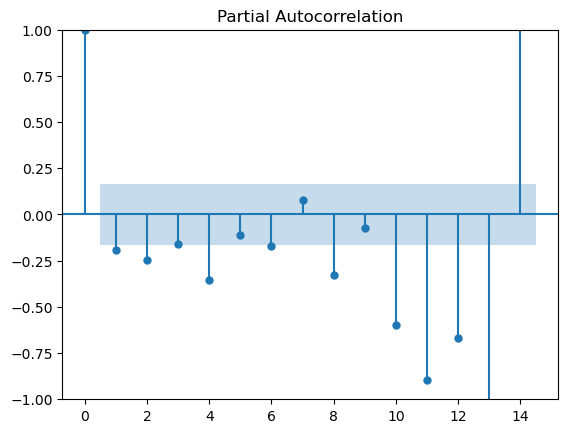

In [43]:
# Trend 
# p = 4
# d = 2
# q = 2

plot_pacf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

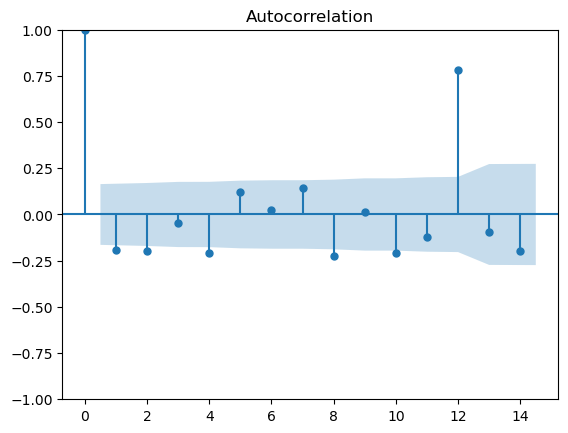

In [44]:
plot_acf(dataset['2nd Diff'].dropna(), lags=14)
plt.show()

In [ ]:
# Seasonality
# P = 2
# D = 1
# Q = 5

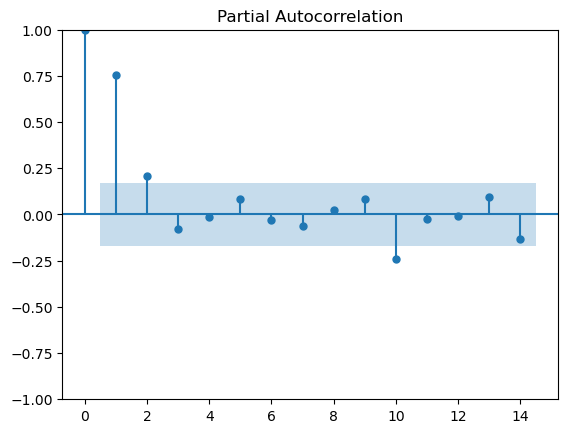

In [45]:
plot_pacf(dataset['Seasonality'].dropna(), lags=14)
plt.show()

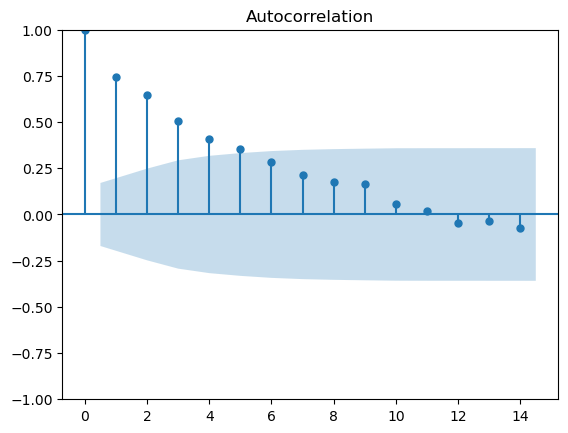

In [46]:
plot_acf(dataset['Seasonality'].dropna(), lags=14)
plt.show()

In [ ]:
# Trend 
# p = 4
# d = 2
# q = 2

# Seasonality
# P = 2
# D = 1
# Q = 5

# Build ARIMA Model for Time Series Forecasting

In [47]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [63]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                 order=(4,2,2), seasonal_order=(2, 1, 1, 12))

result = model.fit()

print(result.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.783
Date:                              Sun, 07 May 2023   AIC                           1015.567
Time:                                      11:38:06   BIC                           1044.242
Sample:                                  01-01-1949   HQIC                          1027.218
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3607      0.097    -14.054      0.000      -1.550      -1.171
ar.L2         -0.49

In [ ]:
# AIC  = 1021.460 : SARIMAX(4, 2, 2)x(2, 1, 5, 12)
# AIC  = 1020.041 : SARIMAX(4, 2, 2)x(2, 1, 4, 12)
# AIC  = 1018.523 : SARIMAX(4, 2, 2)x(2, 1, 3, 12)
# AIC  = 1017.565 : SARIMAX(4, 2, 2)x(2, 1, 2, 12)
# AIC  = 1015.567 : SARIMAX(4, 2, 2)x(2, 1, 1, 12)

In [59]:
len(dataset)

144

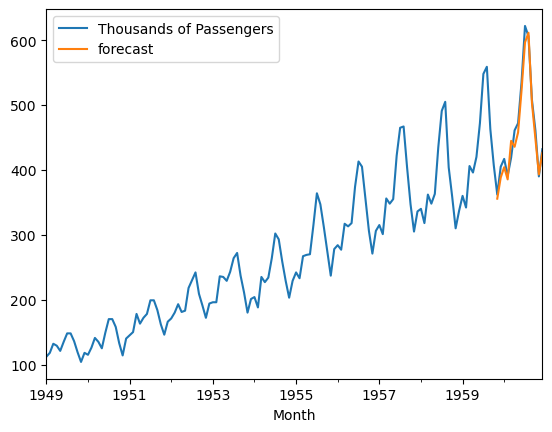

In [64]:
# Predict the given dataset (to split into train and test series)
dataset['forecast'] = result.predict(start=130, end=144, dynamic=True)
dataset[['Thousands of Passengers', 'forecast']].plot()
plt.show()

In [65]:
# Predict 5 years monthly data

from pandas.tseries.offsets import DateOffset

In [66]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,611.502832
1960-09-01,508,-98.0,-82.0,45.0,503.392867
1960-10-01,461,-47.0,51.0,54.0,448.403039
1960-11-01,390,-71.0,-24.0,28.0,393.121299
1960-12-01,432,42.0,113.0,27.0,426.405210


In [69]:
future_dates = [dataset.index[-1] + DateOffset(months = x) for x in range(0,61)]

In [70]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [72]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns = dataset.columns)

In [73]:
future_dates_df

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [74]:
# append both the table (original table and forecasting table)
future_df = pd.concat([dataset, future_dates_df])

In [75]:
future_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [76]:
future_df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [77]:
len(future_df)

204

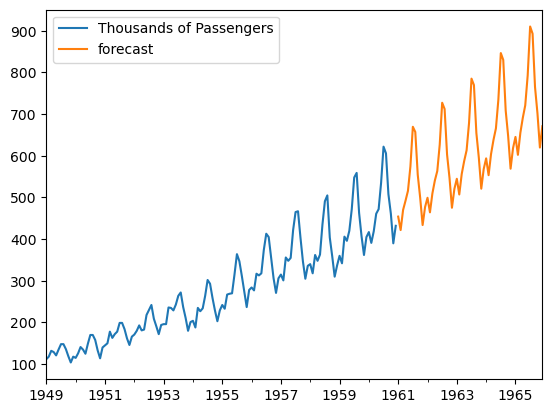

In [78]:
future_df['forecast'] = result.predict(start=144, end=204, dynamic=True)
future_df[['Thousands of Passengers','forecast']].plot()
plt.show()

In [79]:
future_df.tail(65)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,forecast
1960-08-01,606,-16.0,-103.0,47.0,NaN
1960-09-01,508,-98.0,-82.0,45.0,NaN
1960-10-01,461,-47.0,51.0,54.0,NaN
1960-11-01,390,-71.0,-24.0,28.0,NaN
1960-12-01,432,42.0,113.0,27.0,NaN
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,893.107384
1965-09-01,NaN,NaN,NaN,NaN,765.282938
1965-10-01,NaN,NaN,NaN,NaN,701.953191
1965-11-01,NaN,NaN,NaN,NaN,619.902403


In [80]:
future_df.to_csv("5Year_Forecasting.csv")

# THE END 